# Imbalanced Dataset

### What Is an Imbalanced Dataset?
- An imbalanced dataset is one where the number of samples in each class is not equal.
- Example: 

| Class          | Number of Samples |
| -------------- | ----------------- |
| Normal (0)     | 950               |
| Fraudulent (1) | 50                |

- Here, class 1 represents only 5% of the data → highly imbalanced.
```
pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
```

### Why Is It a Problem?
- Accuracy becomes misleading
(e.g., 95% accuracy by predicting only class 0!)
- Model becomes biased toward majority class
- Minority class (often most important!) is underrepresented
- Poor recall, precision, F1 score for minority class

### How to Detecting Imbalance
🔹 Use Python:
```
from collections import Counter
print(Counter(y_train))
```

🔹 Visualize with a bar plot:
```
import seaborn as sns
sns.countplot(x=y_train)
```

## Techniques to Handle Imbalanced Datasets

### 🔷 5.1 Resampling Techniques
##### a) Undersampling (Reduce Majority Class):
- Reduce number of samples from majority class to balance.
- We will reduce the majority of the class so that it will have same no of as the minority.
```
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X, y)
```
- Risk: You may lose useful data.


##### b) Oversampling (Increase Minority Class):
- Duplicate or generate more minority class samples.
- We will increase the size of manority is inactive class to the size of majority class is active.
```
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X, y)
```
- Risk of overfitting (repeating data)


##### c) SMOTE (Synthetic Minority Oversampling Technique):
- Generate synthetic minority samples using k-NN.
```
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
```
- ✅ Better than simple duplication



### 🔷 5.2 Algorithmic Techniques

##### a) Use algorithms that handle imbalance better:
- XGBoost, LightGBM, RandomForest with class weighting
- Set class weights during training
```
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced')
```

##### b) Use custom loss functions (e.g., weighted cross-entropy):
- In TensorFlow, PyTorch — set weight for minority class.
```
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
```


### 🔷 5.3 Change the Decision Threshold
- Default threshold for classification is 0.5
- You can lower it (e.g., 0.3) to catch more positives (higher recall).
```
y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)
```

---

# Example From ChatGPT

[[-0.05861915 -0.35109008]
 [ 1.24668618  1.15359685]
 [ 0.96277683  0.85939747]
 ...
 [-0.10126746 -1.59017563]
 [ 0.64376105 -0.78053855]
 [ 0.69852984 -1.27940455]] [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

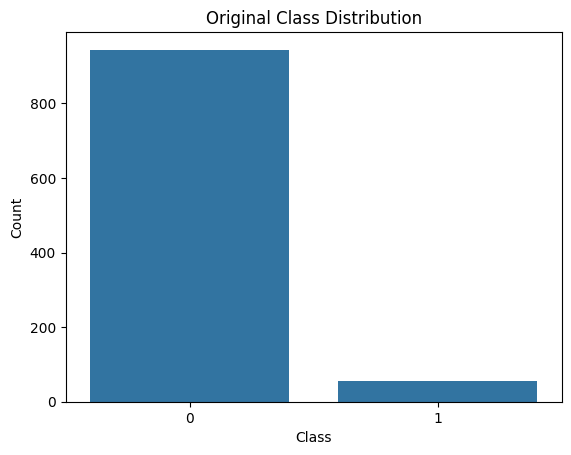

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# Plot class distribution
# also can use .value_counts() function to check the number of unique values and how many times that values occers.
sns.countplot(x=y)
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


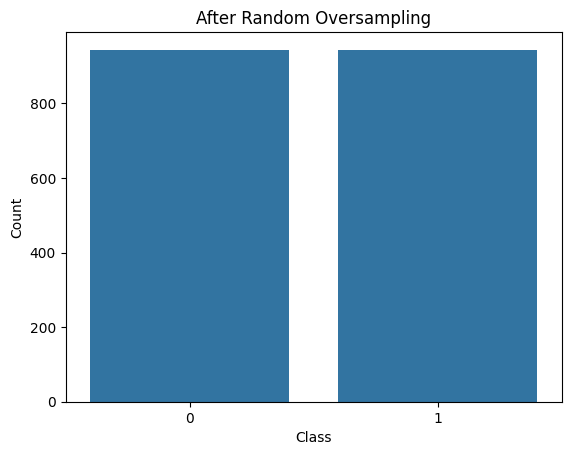

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling
ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)   # here we are not using fit_transform() we are using fit_resample() to sample function.

# Plot new class distribution
sns.countplot(x=y_over)
plt.title("After Random Oversampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


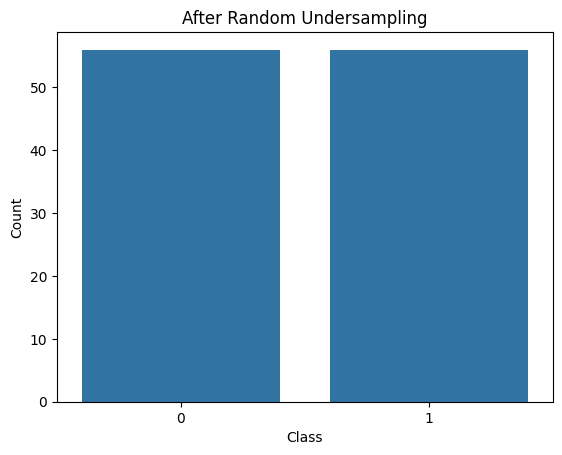

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)   # here we are not using fit_transform() we are using fit_resample() to sample function.

# Plot new class distribution
sns.countplot(x=y_under)
plt.title("After Random Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [6]:
print(f"Original Data: {pd.Series(y).value_counts().to_dict()}")
print(f"Oversampled:   {pd.Series(y_over).value_counts().to_dict()}")
print(f"Undersampled:  {pd.Series(y_under).value_counts().to_dict()}")

Original Data: {0: 944, 1: 56}
Oversampled:   {0: 944, 1: 944}
Undersampled:  {0: 56, 1: 56}
